Makinde Ayoola, 21028253
<h1>INTRODUCTION</h1>
GDP per capita measures the economic output of a nation per person. 

The economic output of a nation or region per person is measured by the GDP per capita. 

The GDP per capital of some regions of the world over the period of 48 years. The data was gotten from the world bank database.  GDP per capita is gross domestic product divided by midyear population. GDP is the sum of gross value added by all resident producers in the economy plus any product taxes and minus any subsidies not included in the value of the products. It is calculated without making deductions for depreciation of fabricated assets or for depletion and degradation of natural resources. Data are in current U.S. dollars. 

 
In this exercise we will be Classifying the GDP per Capita of 2 regions over a period of 49 years into 4 Using K-MEAN clustering algorithms from python sklearn library. 

Building a model that fits the data using the scipy.optimize from python and predicting the GDP per capita of 2 regions in 10 years time from 2020 with an error range.  

 

In [1]:
#import libraries and modules
import pandas as pd
import scipy.optimize as opt
import numpy as np
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_theme()

%matplotlib inline

In [2]:
def create_dataframe(data ):
    """ Function for creating dataframe
        data: data file to be read
    """
    
    #read the csv fill and dropna
    df = pd.read_csv(data).dropna()
    
    #convert Time column to integal
    df['Time'] = df['Time'].astype(int)
    df = df.set_index(df['Time'])
    
    #drop unneeded columns
    df = df.drop(['Time Code', 'Series Code', 'Series Name', 'Time'], axis = 1)
    df = df.drop([2021])
    
    #Transpose of the dataframe
    df_T = df.transpose()
 
    #return two dataframe and transpose one of it
    return df, df_T

In [3]:
def norm(array):
    """ Returns array normalised to [0,1]. Array can be a numpy array 
    or a column of a dataframe"""

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array-min_val) / (max_val-min_val)
    
    return scaled
def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [4]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

In [5]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    
    f = scale * np.exp(growth * (t-1972)) 
    
    return f

def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth rate
    and time of the turning point as free parameters
    """
    
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    
    return f

In [6]:
def err_ranges(x, func, param, sigma):
    """
    Calculates the upper and lower limits for the function, parameters and
    sigmas for single value or array x. Functions values are calculated for 
    all combinations of +/- sigma and the minimum and maximum is determined.
    Can be used for all number of parameters and sigmas >=1.
    
    This routine can be used in assignment programs.
    """

    import itertools as iter
    
    # initiate arrays for lower and upper limits
    lower = func(x, *param)
    upper = lower
    
    uplow = []   # list to hold upper and lower limits for parameters
    for p,s in zip(param, sigma):
        pmin = p - s
        pmax = p + s
        uplow.append((pmin, pmax))
        
    pmix = list(iter.product(*uplow))
    
    for p in pmix:
        y = func(x, *p)
        lower = np.minimum(lower, y)
        upper = np.maximum(upper, y)
        
    return lower, upper   


In [7]:
def fitting_logistics(column1, column2, a, b, c):
    """
    Creates a curve fit function and plot the result with the confidence range
    column1 : x axis
    column2 : y axis
    a, b, c : intial guess for the curve 
    """     
    
    #fitting the data with a logistics function
    popt, covar = opt.curve_fit(logistics, column1, 
                            column2,
                           p0=(a, b, c))
    
    #creates new column for the curve fit
    newcolumn = logistics(column1, *popt)
    
    #prediction in 10 years
    ten_years = logistics(2030, *popt)
    
    #print and plot the curve fit and prediction in 10 years
    print(ten_years)
    plt.figure(figsize=(7,7))
    plt.plot(column1, column2, label="data")
    plt.plot(df.index, newcolumn, label="fit")
    plt.plot(2030, ten_years, 'o', label='prediction in 10years')
    plt.title('Logistic Model fitting')
    plt.xlabel("year")
    region_name = ' GDP per capita '
    plt.ylabel(str(column2.name + region_name))
    plt.legend(loc=2)
    plt.show()
    
    
    # extract the sigmas from the diagonal of the covariance matrix
    sigma = np.sqrt(np.diag(covar))
  

    low, up = err_ranges(df.index, logistics, popt, sigma)
   
    #plot graph with confidence range
    plt.figure(figsize=(7,7))
    plt.title("Logistics model with confidence range")
    plt.plot(column1, column2, label="data")
    plt.plot(column1, newcolumn, label="fit")
    plt.plot(2030, ten_years, 'o', label='prediction in 10years')
    plt.fill_between(df.index, low, up, alpha=0.7)
    
    
    plt.fill_between(2030, low, up, alpha=0.7)
    plt.legend(loc=2)
    plt.xlabel("year")
    plt.ylabel(str(column2.name + region_name))
    plt.savefig(str(column2.name))
    plt.show()
    
    
    print("Forcasted population")
    print('GDP per capita in 10years from 2020 is ', + ten_years)
    low, up = err_ranges(2030, logistics, popt, sigma)
    print('The error range is from', + low,  ' to ', up)


    

In [8]:
#create 2 dataframe using create_dataframe function
df, df_T = create_dataframe('~/Downloads/applied course work/cluster2.csv')

In [9]:
# rename dataframe columns
df.columns = ['Middle East & North Africa',
                  'East Asia & Pacific',
                  'Europe & Central Asia',
                  'Sub-Saharan Africa',
                  'South Asia',
                  'North America',
                  'World',
                  'Latin America & Caribbean'
                 ]

In [10]:
#convert values in dataframe to float 
df = df.astype(float)

In [11]:
#normalize dataframe using the norm_df function
df_norm = norm_df(df.copy())

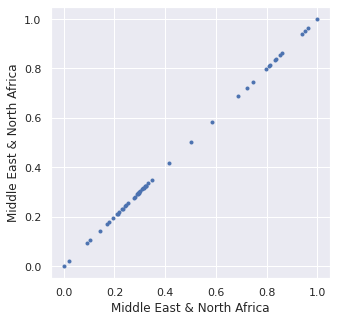

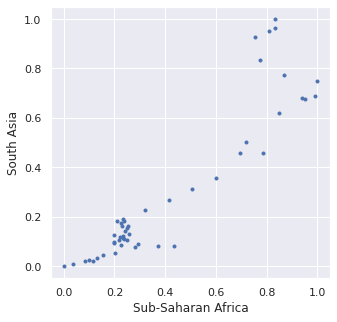

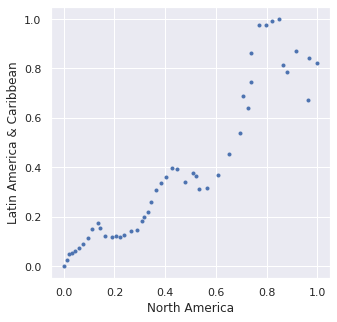

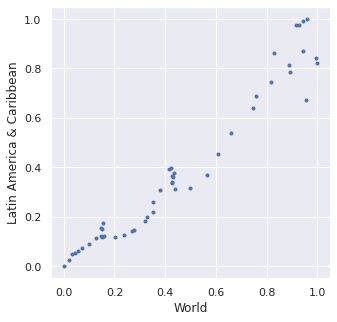

In [12]:
#plot few columns to see the once with intresting data points
makeplot(df_norm, 'Middle East & North Africa', 'Middle East & North Africa' )
makeplot(df_norm, 'Sub-Saharan Africa', 'South Asia')
makeplot(df_norm, 'North America',  'Latin America & Caribbean' )
makeplot(df_norm, 'World', 'Latin America & Caribbean')

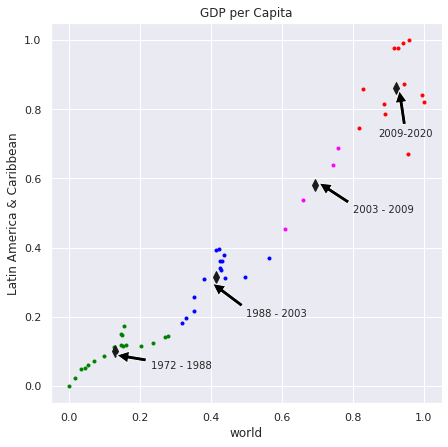

In [17]:
#performing the k-mean cluster algorithm
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df_norm[["World", "Latin America & Caribbean"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(7,7))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df_norm["World"][labels==l], df_fit['Latin America & Caribbean'][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=8)


#annotation to describe the clusters on the plot    
plt.annotate("2003 - 2009", xy=(0.7, 0.59), xytext=(0.8, 0.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate("1972 - 1988", xy=(0.13, 0.09), xytext=(0.23, 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate("1988 - 2003", xy=(0.4, 0.3), xytext=(0.5, 0.2),
            arrowprops=dict(facecolor='black', shrink=0.05))


plt.annotate("2009-2020", xy=(0.93, 0.86), xytext=(0.87, 0.72),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel('world')
plt.ylabel("Latin America & Caribbean")
plt.title('GDP per Capita')
plt.show()
#plt.savefig('clusters.png')

it can be observed that the data are grouped into 4 categories. In order for our plot to make more meaning we will plot the K-mean clustering with non normalized data

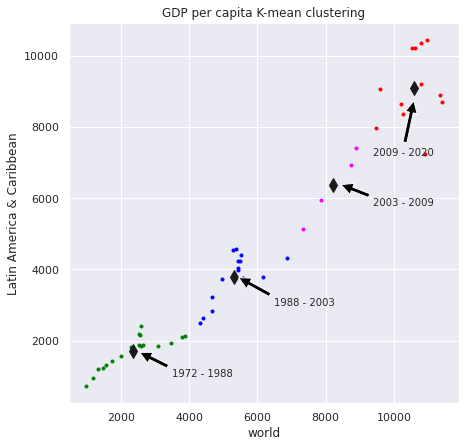

In [14]:
#performing the k-mean cluster alogorithm on non normalized dataframe
kmeans = cluster.KMeans(n_clusters=4)

# extract columns for fitting
df_fit = df[["World", "Latin America & Caribbean"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(7.0,7.0))

col = ["blue", "red", "green", "magenta"]
for l in range(4):     # loop over the different labels
    plt.plot(df["World"][labels==l], df['Latin America & Caribbean'][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(4):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
    
    
#annotation to describe the clusters on the plot    
plt.annotate("1972 - 1988", xy=(2500, 1700), xytext=(3500, 1000),
            arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.annotate("1988 - 2003", xy=(5400, 3800), xytext=(6500, 3000),
            arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.annotate("2003 - 2009", xy=(8400, 6400), xytext=(9400, 5800),
            arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.annotate("2009 - 2020", xy=(10600, 8800), xytext=(9400, 7200),
            arrowprops=dict(facecolor='black', shrink=0.05)) 
plt.title('GDP per capita K-mean clustering')
plt.xlabel('world')
plt.ylabel("Latin America & Caribbean")

#save plot
plt.savefig('world.png')
plt.show()


The output can be read and explained better when we use the normal data 

13837.064465931062


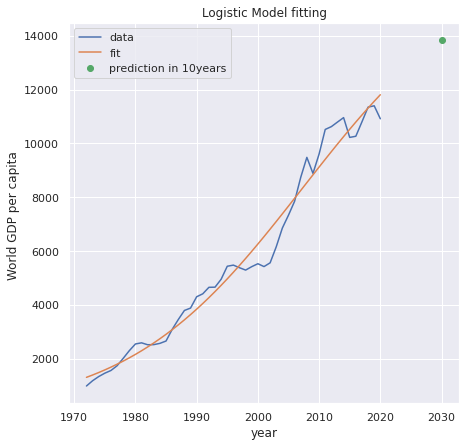

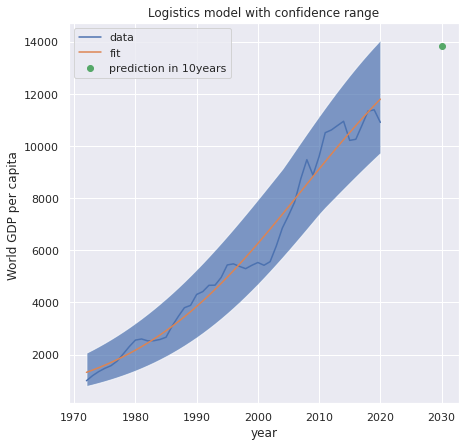

Forcasted population
GDP per capita in 10years from 2020 is  13837.064465931062
The error range is from 11680.667556841756  to  16054.064288091327


In [16]:
#using the fitting_logistics function to curve fit our data
#and plot the perediction and confidence range
fitting_logistics(df.index, df['World'], 2000, 0.2, 1995)

11301.636514758851


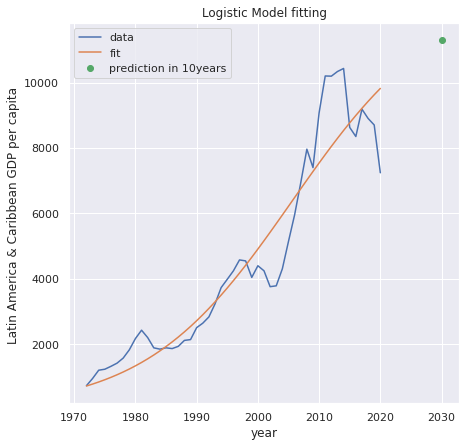

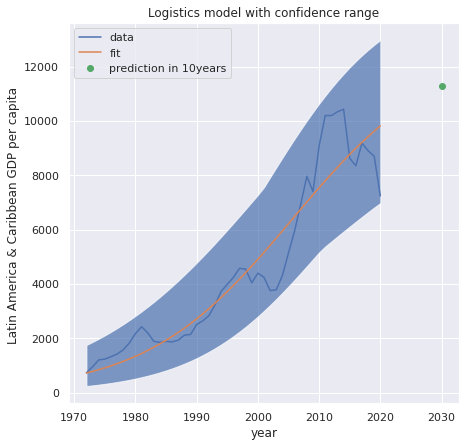

Forcasted population
GDP per capita in 10years from 2020 is  11301.636514758851
The error range is from 8419.15606475092  to  14159.188642670593


In [15]:
#using the fitting_logistics function to curve fit our data
#and plot the perediction and confidence range
fitting_logistics(df.index, df['Latin America & Caribbean'], 2000, 0.2, 1995)

<h1>Conclusion</h1>
Performing a k mean clustering on the GDP per capital of world vs Latin America and the Caribbean shows how the GDP has grown every decade. It can be observed that a new decade ushers in a new record high GDP per capita.

The logistics model fits the World GDP per capita better compared to the Latin America and Caribbean region data. This is because of the non-steady trend in the GDP per capita of the Latin America and Caribbean region. However, the confidence range computed is robust enough to Predict the GDP per capita in 10 years’ time from 2020. 